# Introduction

- Learn python for biological data analysis with chatGPT
- Task specific practice
- 다음 코드는 colab의 default working directory에 개인의 google drive를 연결해 주는 기능을 수행

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## [User]

<span style="color:blue; font-size: 20px">
I want to learn python and use it for molecular biology research such as design of library sequence, design of experiments, read high-throughput sequencing file, apply deep learning algorithm. What topics do i need to learn?
</span>

## [ChatGPT]

Learning Python for molecular biology research involves a blend of general programming skills and domain-specific knowledge. Here’s a structured guide on the topics you need to cover:

### Table of Contents

#### Basic Python Programming
- **Python Syntax and Semantics**: Learn basic syntax, data types (strings, lists, dictionaries), control structures (if statements, loops), functions, and error handling.
- **Modules and Packages**: Understand how to import and use standard libraries and third-party packages.
- **File I/O**: Learn how to read from and write to files.

#### Data Handling and Analysis
- **NumPy**: For numerical operations and handling arrays.
- **Pandas**: For data manipulation and analysis, essential for handling tabular data, such as gene expression matrices.
- **Matplotlib/Seaborn**: For data visualization to generate plots and graphs.

#### Bioinformatics Libraries
- **Biopython**: Essential for biological computation. Learn how to read/write sequence files, perform sequence analysis, and interact with biological databases.
- **Scikit-bio**: For biological analysis including sequence alignment, biodiversity analysis, etc.

#### Sequence Analysis
- **FASTA/FASTQ Parsing**: Learn how to parse sequence files.
- **Sequence Alignment**: Understand the basics of sequence alignment (global and local), and tools like BLAST.
- **Motif Finding**: Learn how to identify sequence motifs.

#### High-Throughput Sequencing Data
- **HTSeq**: For reading and analyzing high-throughput sequencing data.
- **PySAM**: For reading and manipulating SAM/BAM files (aligned sequencing reads).
- **SeqIO**: Part of Biopython for input/output of sequence data.

#### Experimental Design
- **Primer Design**: Understand the principles of primer design and tools available (like Primer3) and their Python interfaces.
- **Golden Gate Assembly and Gibson Assembly**: Learn the principles and how to design experiments programmatically.

#### Statistical Analysis
- **SciPy**: For scientific and technical computing.
- **Statsmodels**: For statistical modeling.
- **R Integration**: Learn how to use R from Python (via rpy2) if you need to use specific R packages for statistical analysis.

#### Machine Learning and Deep Learning
- **Scikit-learn**: For machine learning algorithms.
- **TensorFlow/Keras or PyTorch**: For deep learning.
- **Bioinformatics-specific models**: Learn about models specific to bioinformatics, such as predicting protein structures or gene expression levels.

#### Workflow Automation
- **Snakemake**: For workflow management.
- **Nextflow**: Another workflow management tool, useful for reproducible research.

#### Advanced Topics
- **Data Integration**: Integrating different types of biological data (genomic, transcriptomic, proteomic).
- **Network Biology**: Understanding biological networks (e.g., protein-protein interaction networks).
- **Structural Bioinformatics**: Analyzing protein structures using tools like PyMOL.

#### Learning Resources
1. **Books**
   - "Python for Biologists" by Martin Jones
   - "Bioinformatics Programming Using Python" by Mitchell L. Model

2. **Online Courses**
   - Coursera: "Python for Genomic Data Science" by Johns Hopkins University
   - edX: "Python for Data Science" by Microsoft
   - Biostars: Online forum for bioinformatics questions and tutorials.

3. **Tutorials and Documentation**
   - Biopython Tutorial and Cookbook: Comprehensive guide to using Biopython.
   - NumPy and Pandas documentation: Essential for data manipulation.
   - Scikit-learn and TensorFlow/Keras documentation: For machine learning and deep learning.

By following this structured guide, you’ll be able to leverage Python effectively for molecular biology research.

## [User]

<span style="color:blue; font-size: 20px">
I'll learn it using google colab. can you let me know how to setup the colab environment for this learning
</span>

## [ChatGPT]

Certainly! Google Colab is an excellent platform for learning and running Python code, especially for bioinformatics. It provides a cloud-based Jupyter notebook environment that comes pre-configured with many scientific libraries. Here’s how to set up and use Google Colab for learning bioinformatics with Python:

### Step-by-Step Guide to Setting Up Google Colab

#### Access Google Colab
- Go to [Google Colab](https://colab.research.google.com/) in your web browser.
- Sign in with your Google account.

#### Create a New Notebook
- Click on `File` -> `New Notebook` to create a new notebook.

#### Install Required Libraries
Google Colab comes with many libraries pre-installed, but you might need to install some additional ones, such as `biopython` and `scikit-bio`. You can do this using the `!pip install` command directly in a cell.


In [ ]:
!pip install biopython scikit-bio

#### Import Libraries and Verify Installation
In a new code cell, import the libraries to ensure they are installed correctly.


In [2]:
# Importing necessary libraries
import Bio
import skbio

print("Biopython version:", Bio.__version__)
print("scikit-bio version:", skbio.__version__)

Biopython version: 1.83
scikit-bio version: 0.6.0



#### Upload Files to Colab

- 구글 드라이브에 `2024-cnu-lecture` 폴더를 만들기

- 다운로드 하거나 공유된 (ipynb) 파일을 `2024-cnu-lecture` 폴더에 복사후 colab으로 open

- 분석을 위한 ganbank 파일 ncbi에서 다운로드

- 구글 드라이브의 위 디렉토리에 genbank 파일 복사 또는 다음 코드로 로컬 파일을 업로드 가능

- 현재 작업 디렉토리 확인

In [ ]:
!pwd

- 현재 작업 디렉토리를 위 생성한 디렉토리로 변경

In [ ]:
import os
os.chdir('drive/MyDrive/2024-cnu-lecture')

In [ ]:
!pwd

- 분석을 위한 genbank 등의 파일을 ncbi에서 다운로드 후 위 폴더에 복사 
- 또는 아래 코드를 이용해서 현재 작업 디렉토리에 업로드

In [ ]:
from google.colab import files

uploaded = files.upload()

# Listing the uploaded files
for filename in uploaded.keys():
    print(filename)

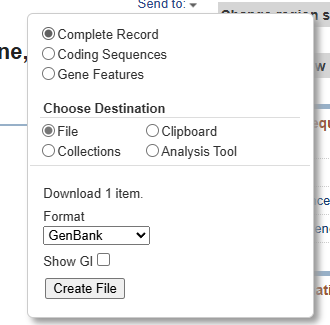


#### Example: Reading a GenBank File and Analyzing Sequences

- Here’s an example workflow that reads a GenBank file, performs sequence analysis with Biopython, and aligns sequences with scikit-bio:
- 위에서 다운로드 받은 genbank 파일을 egfp.gb 이름으로 변경 후 업로드
- 아래 예시 코드는 단백질 서열을 읽고 비교하는 코드임 


In [5]:
from Bio import SeqIO
from Bio.Seq import Seq
from skbio import Protein
from skbio.alignment import global_pairwise_align_protein

# Assuming the uploaded GenBank file is named 'example.gb'
genbank_file = 'data/egfp.gb'

# Read a protein sequence from a GenBank file
record = SeqIO.read(genbank_file, "genbank")
print(len(record.seq))

protein_seq = record.seq.translate()
print(protein_seq)

# Perform alignment with another protein sequence
seq1 = Protein(str(protein_seq))
seq2 = Protein("MKVLYNLKDG")

alignment, score, start_end_positions = global_pairwise_align_protein(seq1, seq2)

print("Alignment:\n", alignment)
print("Score:", score)
print("Start-End Positions:", start_end_positions)


1150
MSRVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLTYGVQCFSRYPDHMKQHDFFKSAMPEGYVQEVDLCILLS*EVELFPFCVLQLQMEIHRDTRGFCLVLSFVLVVN*KFIHLQEINSLLFKSKGLTYVSVKHWIPKNSKMR*GIFNLVWTSNRLG*PPVKLQQDCLLTQCLRSDVQ*LVLFHFALDFLFANELCF*WFSLFWCVENHLLQGRRQLQDPRRGEVRGRHPGEPHRAEGHRLQGGRQHPGAQAGVQLQQPQRLYHGRQAEERHQGELQDPPQHRGRQRAARRPLPAEHPHRRRPRAAARQPLPEHPVRPEQRPQREARSHGPAGVRDRRRDHSRHGRAVQV
Alignment:
 TabularMSA[Protein]
-----------------------------------------------------------------------
Stats:
    sequence count: 2
    position count: 384
-----------------------------------------------------------------------
MSRVSKGEELFTGVVPILVEL-DGDVNGHKFSV ... PEQRPQREARSHGPAGVRDRRRDHSRHGRAVQV
--------------MKVLYNLKDG--------- ... ---------------------------------
Score: 18.0
Start-End Positions: [(0, 382), (0, 9)]


/home/haseong/anaconda3/envs/biopy/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(
/home/haseong/anaconda3/envs/biopy/lib/python3.11/site-packages/skbio/alignment/_pairwise.py:538: EfficiencyWarning: You're using skbio's python implementation of Needleman-Wunsch alignment. This is known to be very slow (e.g., thousands of times slower than a native C implementation). We'll be adding a faster version soon (see https://github.com/scikit-bio/scikit-bio/issues/254 to track progress on this).
  warn(


#### Saving Your Work
You can save your notebook to Google Drive:

- Click on `File` -> `Save a copy in Drive`.

#### Sharing Your Notebook
You can share your notebook with others by clicking on the `Share` button in the top right corner and setting the appropriate sharing permissions.

#### Example Colab Notebook
Here’s a more comprehensive example notebook that includes reading files, sequence analysis, and visualization: (다음 코드 참고)

This notebook covers:
- Installing and importing bioinformatics libraries.
- Uploading and reading files.
- Performing sequence analysis.
- Visualizing data.

By following these steps and examples, you'll be well-prepared to use Google Colab for your bioinformatics learning and research.

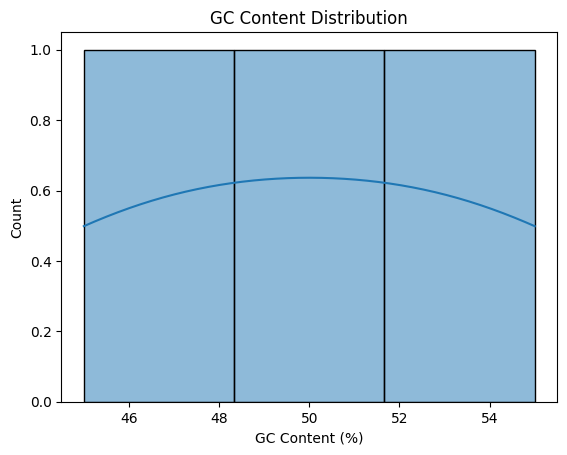

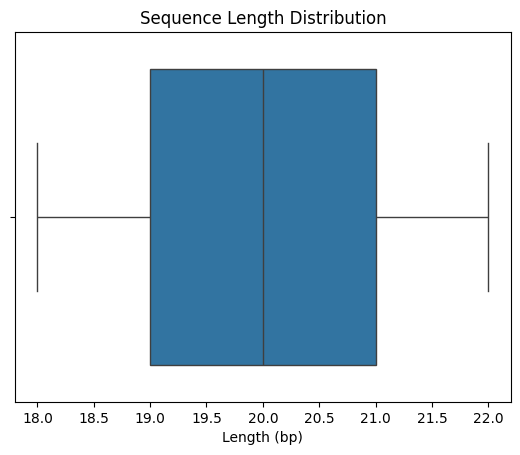

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Example data for visualization
data = {
    'Sequence': ['Seq1', 'Seq2', 'Seq3'],
    'GC_Content': [50, 55, 45],
    'Length': [20, 22, 18]
}

# Visualize using Seaborn
df = pd.DataFrame(data)
sns.histplot(df['GC_Content'], kde=True)
plt.title('GC Content Distribution')
plt.xlabel('GC Content (%)')
plt.show()

sns.boxplot(x=df['Length'])
plt.title('Sequence Length Distribution')
plt.xlabel('Length (bp)')
plt.show()